<a href="https://colab.research.google.com/github/AalaaAyman24/Teeth_Classification/blob/main/Teeth_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import os

image_folder_path = '/content/drive/MyDrive/Teeth_Dataset'
Types = list(os.listdir(image_folder_path))
Illness=list(os.listdir(os.path.join(image_folder_path,Types[2])))
print(Types)

train_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Teeth_Dataset/Training')
test_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Teeth_Dataset/Testing')
validation_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Teeth_Dataset/Validation')

print(Illness)

['Validation', 'Testing', 'Training']
Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
['OLP', 'OT', 'CaS', 'MC', 'OC', 'CoS', 'Gum']


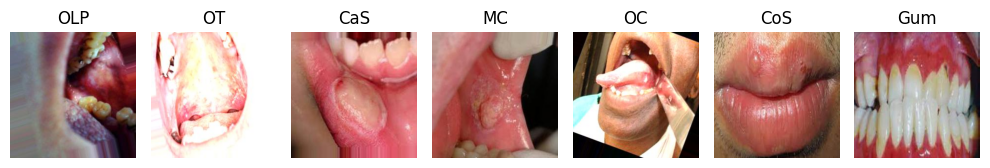

<Figure size 640x480 with 0 Axes>

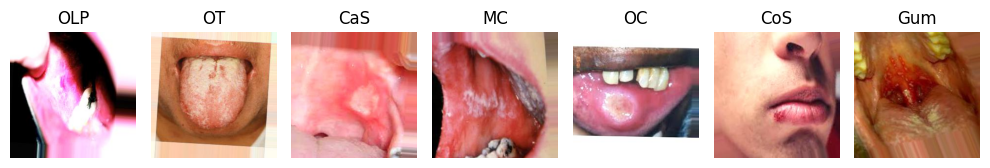

<Figure size 640x480 with 0 Axes>

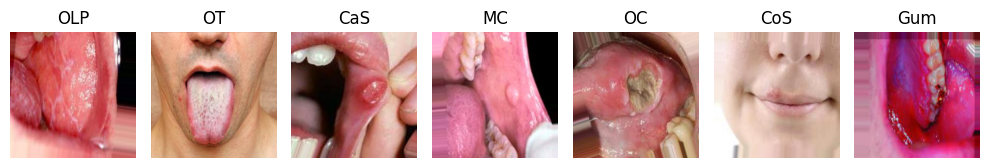

Text(0.5, 1.0, 'Random Images [Test Dataset]:')

<Figure size 640x480 with 0 Axes>

In [24]:
def plot_one_image_per_illness(category, illness_list):

    fig, axes = plt.subplots(1, len(illness_list), figsize=(10, 10))
    if len(illness_list) == 1:
        axes = [axes]

    for ax, illness in zip(axes, illness_list):
        illness_dir = os.path.join(image_folder_path, category, illness)
        valid_extensions = ('.jpeg', '.jpg', '.bmp', '.png')
        illness_images = list(filter(lambda x: x.endswith(valid_extensions), os.listdir(illness_dir)))

        if illness_images:
            img_path = os.path.join(illness_dir, random.choice(illness_images))
            img = plt.imread(img_path)
            ax.imshow(img)
            ax.set_title(illness)
            ax.axis('off')
        else:
            ax.set_title(f'No images for {illness}')
            ax.axis('off')

    plt.tight_layout()
    plt.show()


plot_one_image_per_illness(Types[2], Illness)
plt.suptitle('Random Images [Validation Dataset]:', y=1.00)

plot_one_image_per_illness(Types[1], Illness)
plt.suptitle('Random Images [Training Dataset]:', y=1.00)

plot_one_image_per_illness(Types[0], Illness)
plt.suptitle('Random Images [Test Dataset]:', y=1.00)


In [35]:
def Load_and_preprocessing(train_data, validation_data, target_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical'
    )


    validation_generator = validation_datagen.flow_from_directory(
        validation_data,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical'
    )


    return train_generator, validation_generator


In [61]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,111,767 (217.86 MB)

 Trainable params: 19,037,255 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,074,512 (145.24 MB)

In [60]:
images, labels = next(train_generator)
print('Image batch shape:', images.shape)
print('Labels batch shape:', labels.shape)

Image batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 7)


In [62]:
print(train_generator.class_indices)
print(validation_generator.class_indices)


{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


In [47]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 841s 8s/step - accuracy: 0.2185 - loss: 2.1245 - val_accuracy: 0.2529 - val_loss: 1.8276 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.2934 - loss: 1.8096 - val_accuracy: 0.3307 - val_loss: 1.6362 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.3129 - loss: 1.7176 - val_accuracy: 0.4193 - val_loss: 1.4810 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.3779 - loss: 1.6116 - val_accuracy: 0.4368 - val_loss: 1.5058 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.4233 - loss: 1.5124 - val_accuracy: 0.5156 - val_loss: 1.3234 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.4460 - loss: 1.4408 - val_accuracy: 0.5000 - val_loss: 1.3252 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.4428 - loss: 1.4482 - val_accuracy: 0.55

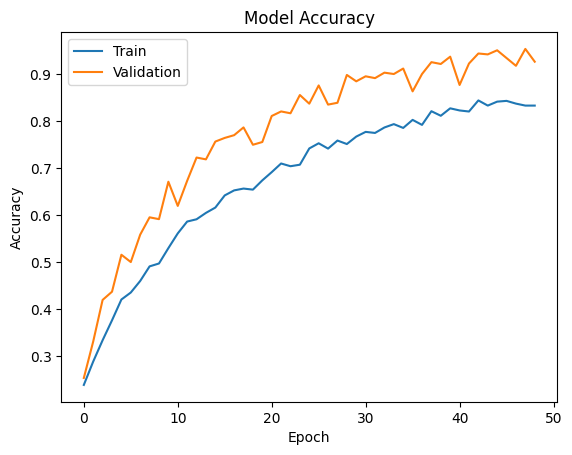

In [48]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


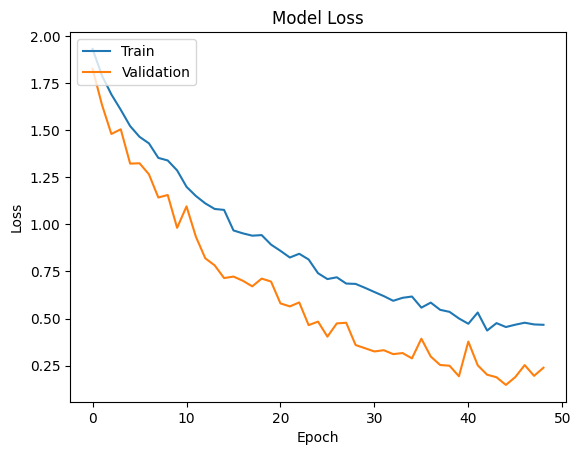

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/MyDrive/Teeth_Dataset/Testing'
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)


test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 1028 images belonging to 7 classes.
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 551ms/step - accuracy: 0.9785 - loss: 0.0993
Test Loss: 0.12858924269676208
Test Accuracy: 0.966926097869873


In [57]:
model.save('teeth_classification_model.h5')

In [58]:
model.save('my_model.keras')
